In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import transformers as ppb
from transformers import BertModel, BertTokenizer
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import missingno as msno
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
data = pd.read_csv("file.csv")
data.head()

Unnamed: 0                                             tweets   labels
0           0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1           1  Try talking with ChatGPT, our new AI system wh...     good
2           2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3           3  THRILLED to share that ChatGPT, our new model ...     good
4           4  As of 2 minutes ago, @OpenAI released their ne...      bad

In [ ]:
data.columns

Index(['Unnamed: 0', 'tweets', 'labels'], dtype='object')

In [ ]:
data = data.iloc[:,1:]

In [ ]:
data.head()

tweets   labels
0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1  Try talking with ChatGPT, our new AI system wh...     good
2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3  THRILLED to share that ChatGPT, our new model ...     good
4  As of 2 minutes ago, @OpenAI released their ne...      bad

In [ ]:
data.labels.value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

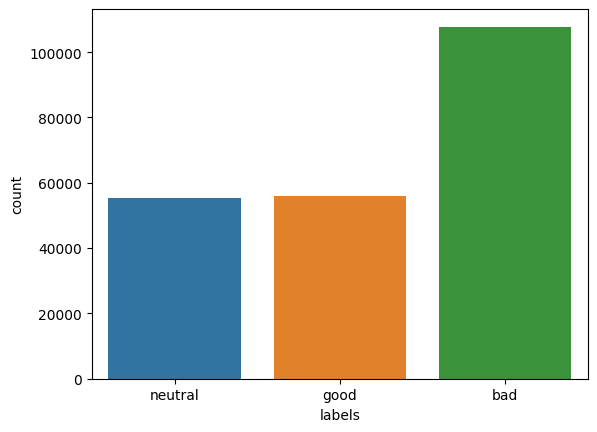

In [ ]:
data['labels'].value_counts()
sns.countplot(data=data, x='labels')
plt.show()

In [ ]:
for i in data.tweets.head(10):
    print(i)
    print()

ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1

Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

As of 2 minutes ago, @OpenAI release

In [ ]:
data['tweet_list'] = data['tweets'].str.split('https:')
text = [i[0] for i in data.tweet_list]
data['text'] = text
data = data[['text', 'labels']]

In [ ]:
data.head()

text   labels
0  ChatGPT: Optimizing Language Models for Dialogue   neutral
1  Try talking with ChatGPT, our new AI system wh...     good
2  ChatGPT: Optimizing Language Models for Dialogue   neutral
3  THRILLED to share that ChatGPT, our new model ...     good
4  As of 2 minutes ago, @OpenAI released their ne...      bad

In [ ]:
import re
# Remove all non-alphanumeric characters from the text list

string = r'[A-Za-z0-9 ]'

trim_list=[]

for row in text:
    s=''
    for letter in row:
        if bool(re.match(string, letter)):
            s+=letter
    trim_list.append(s)

In [ ]:
# Remove the non-printing characters from text

rep_list = ['\U0001fae1', '\\n', '@', '#', '\xa0', '***']

for i in trim_list:
    for j in rep_list:
        if j in i:
            i.replace(j,'')

data['text'] = trim_list
data.head()

text   labels
0   ChatGPT Optimizing Language Models for Dialogue   neutral
1  Try talking with ChatGPT our new AI system whi...     good
2   ChatGPT Optimizing Language Models for Dialogue   neutral
3  THRILLED to share that ChatGPT our new model o...     good
4  As of 2 minutes ago OpenAI released their new ...      bad

In [ ]:
for i in data.text.head(10):
    print(i)
    print()

ChatGPT Optimizing Language Models for Dialogue 

Try talking with ChatGPT our new AI system which is optimized for dialogue Your feedback will help us improve it 

ChatGPT Optimizing Language Models for Dialogue 

THRILLED to share that ChatGPT our new model optimized for dialog is now public free and accessible to everyone 

As of 2 minutes ago OpenAI released their new ChatGPT nnAnd you can use it right now  

Just launched ChatGPT our new AI system which is optimized for dialogue 

As of 2 minutes ago OpenAI released their new ChatGPT nnAnd you can use it right now n n

ChatGPT coming out strong refusing to help me stalk someone but agreeing providing that someone is Waldo 

0penAl just deployed a thing Ive been helping build the last couple of months its a chatbot based on GPT 3 Im really excited to share this vln

Research preview of our newest model ChatGPTnnWere trying something new with this preview Free and immediately available for everyone no waitlist 



In [ ]:
data.head(10)

text   labels
0   ChatGPT Optimizing Language Models for Dialogue   neutral
1  Try talking with ChatGPT our new AI system whi...     good
2   ChatGPT Optimizing Language Models for Dialogue   neutral
3  THRILLED to share that ChatGPT our new model o...     good
4  As of 2 minutes ago OpenAI released their new ...      bad
5  Just launched ChatGPT our new AI system which ...     good
6  As of 2 minutes ago OpenAI released their new ...      bad
7  ChatGPT coming out strong refusing to help me ...     good
8  0penAl just deployed a thing Ive been helping ...     good
9  Research preview of our newest model ChatGPTnn...  neutral

In [ ]:
data.labels.value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

In [ ]:
data["sentiment"] = data["labels"].replace(['bad', 'neutral', 'good'], [0, 1, 2])
df = data
df.head()

text   labels  sentiment
0   ChatGPT Optimizing Language Models for Dialogue   neutral          1
1  Try talking with ChatGPT our new AI system whi...     good          2
2   ChatGPT Optimizing Language Models for Dialogue   neutral          1
3  THRILLED to share that ChatGPT our new model o...     good          2
4  As of 2 minutes ago OpenAI released their new ...      bad          0

In [ ]:
fig = go.Figure([go.Bar(x=data.sentiment.value_counts().index, y=data.sentiment.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

In [ ]:
data.loc[data['sentiment'] >1 , 'label'] = 1
data.loc[data['sentiment'] <=1 , 'label'] = 0

data['label'].astype(int)
data = data.drop(columns = 'labels')

data.head()

text  sentiment  label
0   ChatGPT Optimizing Language Models for Dialogue           1    0.0
1  Try talking with ChatGPT our new AI system whi...          2    1.0
2   ChatGPT Optimizing Language Models for Dialogue           1    0.0
3  THRILLED to share that ChatGPT our new model o...          2    1.0
4  As of 2 minutes ago OpenAI released their new ...          0    0.0

In [ ]:
model_class, token_class, pre_weights = (ppb.DistilBertModel,ppb.DistilBertTokenizer,'distilbert-base-uncased')
token = token_class.from_pretrained(pre_weights)
classifier = model_class.from_pretrained(pre_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
batch_1 = data[:500]
batch_1['label'].value_counts()

0.0    334
1.0    166
Name: label, dtype: int64

In [ ]:
token_d = batch_1['text'].apply((lambda x: token.encode(x, add_special_tokens = True,
                                                               truncation = True,
                                                               max_length = 250,
                                                               padding = True)))
print(token_d)

0      [101, 11834, 21600, 2102, 23569, 27605, 6774, ...
1      [101, 3046, 3331, 2007, 11834, 21600, 2102, 22...
2      [101, 11834, 21600, 2102, 23569, 27605, 6774, ...
3      [101, 16082, 2000, 3745, 2008, 11834, 21600, 2...
4      [101, 2004, 1997, 1016, 2781, 3283, 2330, 4886...
                             ...                        
495    [101, 7929, 10047, 3374, 2021, 2023, 2003, 468...
496    [101, 5580, 2000, 2963, 2008, 11834, 21600, 21...
497    [101, 2007, 2330, 4886, 11834, 21600, 2102, 20...
498    [101, 4921, 2063, 2464, 2438, 11834, 21600, 21...
499    [101, 1045, 2342, 2619, 2000, 2425, 2033, 3251...
Name: text, Length: 500, dtype: object


In [ ]:
maximum_length = 250
for i in token_d.values:
    if len(i) > maximum_length:
        maximum_length = len(i)
        
padded = np.array([i + [0] * (maximum_length - len(i)) for i in token_d.values])
input = torch.tensor(np.array(padded))
print(input)
input.shape

tensor([[  101, 11834, 21600,  ...,     0,     0,     0],
        [  101,  3046,  3331,  ...,     0,     0,     0],
        [  101, 11834, 21600,  ...,     0,     0,     0],
        ...,
        [  101,  2007,  2330,  ...,     0,     0,     0],
        [  101,  4921,  2063,  ...,     0,     0,     0],
        [  101,  1045,  2342,  ...,     0,     0,     0]])


torch.Size([500, 250])

In [ ]:
a_mask = np.where(padded != 0, 1, 0)
a_mask = torch.tensor(a_mask)
print(a_mask)
a_mask.shape

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])


torch.Size([500, 250])

In [ ]:
with torch.no_grad():
    last_hidden_states = classifier(input, attention_mask = a_mask, return_dict = False)

In [ ]:
features = last_hidden_states[0][:, 0, :].numpy()
labels = batch_1['label']

In [ ]:
features.shape

(500, 768)

In [ ]:
labels.shape

(500,)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

gnb = GaussianNB()
tree = DecisionTreeClassifier(random_state=20)
knn = KNeighborsClassifier(n_neighbors=3)
svm = LinearSVC(random_state=20, dual = False)
log = LogisticRegression(random_state = 20)
rf = RandomForestClassifier(max_depth=4, random_state=20)
models = [gnb, tree, knn, log, rf, svm]
gnb.fit(train_features, train_labels)
tree.fit(train_features, train_labels)
knn.fit(train_features, train_labels)
svm.fit(train_features, train_labels)
log.fit(train_features, train_labels)
rf.fit(train_features, train_labels)
y_pred_gnb = gnb.predict(test_features)
y_pred_tree = tree.predict(test_features)
y_pred_knn = knn.predict(test_features)
y_pred_svm = svm.predict(test_features)
y_pred_log = log.predict(test_features)
y_pred_rf = rf.predict(test_features)

In [ ]:
def cf(model):
    y_pred = model.predict(test_features)
    cf = confusion_matrix(test_labels,y_pred)   
    counts = ['{0:0.0f}'.format(i) for i in cf.flatten()]
    counts = np.asarray(counts).reshape(2,2)
    ax = plt.axes()
    sns.heatmap(cf, annot=counts, fmt='', cmap='Blues')

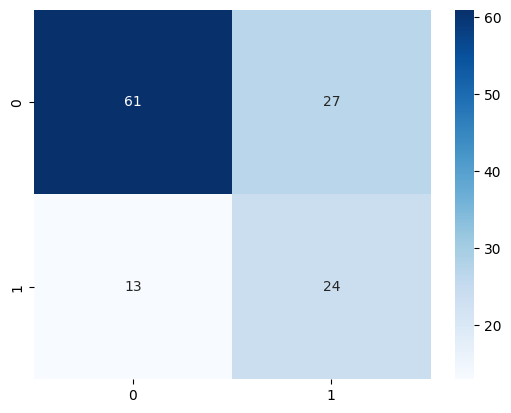

In [ ]:
cf(gnb)

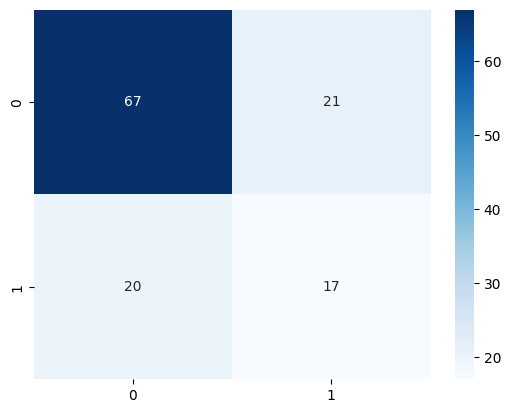

In [ ]:
cf(tree)

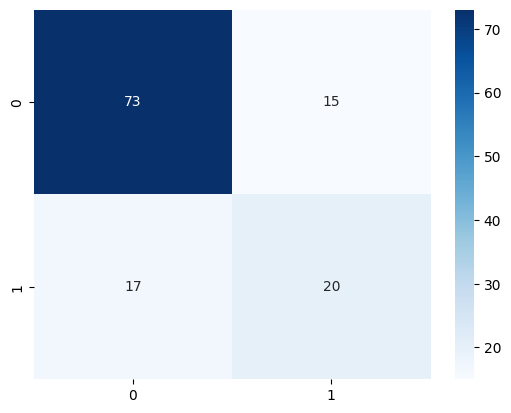

In [ ]:
cf(knn)

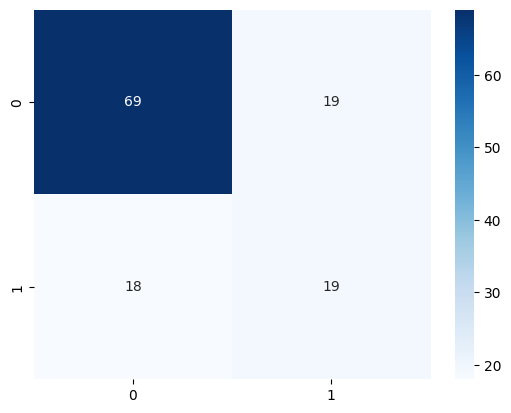

In [ ]:
cf(svm)

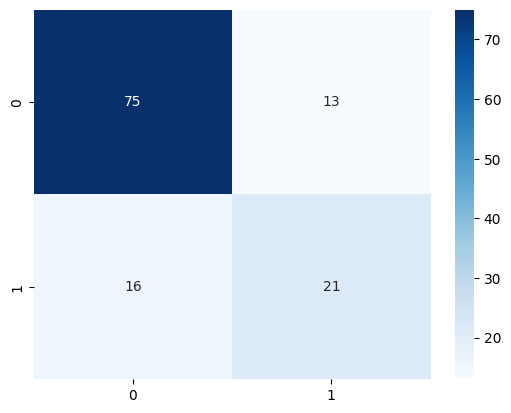

In [ ]:
cf(log)

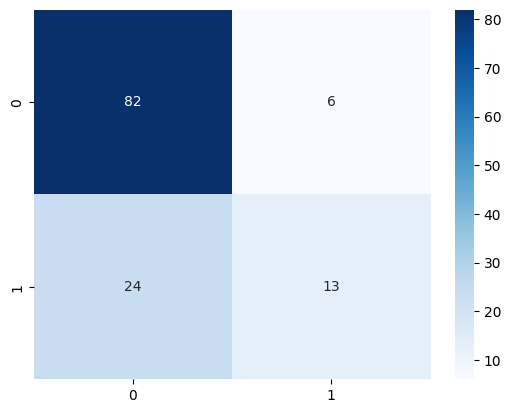

In [ ]:
cf(rf)

In [ ]:
data_list=[]
for model in models:
  y_pred = model.predict(test_features)
  cf_try = confusion_matrix(test_labels,y_pred)
  tp = cf_try[0][0]
  fp = cf_try[1][0]
  fn = cf_try[1][1]
  tn = cf_try[0][1]
  tpr = tp / (tp + fn)
  fpr = fp / (fp + tn)
  accuracy = np.sum(tp) / np.sum(cf_try)
  df2 = [tp,fp,fn,tn,tpr,fpr,accuracy]
  data_list.append(df2)

In [ ]:
data_list

[[61, 13, 24, 27, 0.7176470588235294, 0.325, 0.488],
 [67, 20, 17, 21, 0.7976190476190477, 0.4878048780487805, 0.536],
 [73, 17, 20, 15, 0.7849462365591398, 0.53125, 0.584],
 [75, 16, 21, 13, 0.78125, 0.5517241379310345, 0.6],
 [82, 24, 13, 6, 0.8631578947368421, 0.8, 0.656],
 [69, 18, 19, 19, 0.7840909090909091, 0.4864864864864865, 0.552]]

In [ ]:
df2 = pd.DataFrame(data_list,columns=["True Positive","False Positive","False Negative","True Negative","True Positive Rate","False Positive Rate","Accuracy"],
                  index=["Gausian Naive Bayes","Decision Tree","K-NN","Linear SVM","Logisitic Regression","Random Forest Classifier"])
df2

True Positive  False Positive  False Negative  \
Gausian Naive Bayes                  61              13              24   
Decision Tree                        67              20              17   
K-NN                                 73              17              20   
Linear SVM                           75              16              21   
Logisitic Regression                 82              24              13   
Random Forest Classifier             69              18              19   

                          True Negative  True Positive Rate  \
Gausian Naive Bayes                  27            0.717647   
Decision Tree                        21            0.797619   
K-NN                                 15            0.784946   
Linear SVM                           13            0.781250   
Logisitic Regression                  6            0.863158   
Random Forest Classifier             19            0.784091   

                          False Positive Rate  Accuracy  
Gausian Naive Bayes                  0.325000     0.488  
Decision Tree                        0.487805     0.536  
K-NN                                 0.531250     0.584  
Linear SVM                           0.551724     0.600  
Logisitic Regression                 0.800000     0.656  
Random Forest Classifier             0.486486     0.552

In [ ]:
for model in models:
    scores = cross_val_score(model, test_features, test_labels, scoring='accuracy') 
    print('Min Accuracy of {}: %.3f'.format(str(model)) % (scores.min()))
    print('Max Accuracy of {}: %.3f'.format(str(model)) % (scores.max()))
    print('Mean Accuracy of {}: %.3f'.format(str(model)) % (np.mean(scores)))

Min Accuracy of GaussianNB(): 0.600
Max Accuracy of GaussianNB(): 0.800
Mean Accuracy of GaussianNB(): 0.704
Min Accuracy of DecisionTreeClassifier(random_state=20): 0.560
Max Accuracy of DecisionTreeClassifier(random_state=20): 0.680
Mean Accuracy of DecisionTreeClassifier(random_state=20): 0.600
Min Accuracy of KNeighborsClassifier(): 0.600
Max Accuracy of KNeighborsClassifier(): 0.760
Mean Accuracy of KNeighborsClassifier(): 0.696
Min Accuracy of LogisticRegression(random_state=20): 0.680
Max Accuracy of LogisticRegression(random_state=20): 0.840
Mean Accuracy of LogisticRegression(random_state=20): 0.768
Min Accuracy of RandomForestClassifier(max_depth=4, random_state=20): 0.680
Max Accuracy of RandomForestClassifier(max_depth=4, random_state=20): 0.800
Mean Accuracy of RandomForestClassifier(max_depth=4, random_state=20): 0.728
Min Accuracy of LinearSVC(dual=False, random_state=20): 0.720
Max Accuracy of LinearSVC(dual=False, random_state=20): 0.800
Mean Accuracy of LinearSVC(dual

In [ ]:
data = data.iloc[:10000,:]
data

text  sentiment  label
0      ChatGPT Optimizing Language Models for Dialogue           1    0.0
1     Try talking with ChatGPT our new AI system whi...          2    1.0
2      ChatGPT Optimizing Language Models for Dialogue           1    0.0
3     THRILLED to share that ChatGPT our new model o...          2    1.0
4     As of 2 minutes ago OpenAI released their new ...          0    0.0
...                                                 ...        ...    ...
9995  Trying to chat with ChatGPT and it lacks humor...          1    0.0
9996  Can ChatGPT do preliminary code reviews I need...          0    0.0
9997                  CHATGPT Im trying to tell you now          0    0.0
9998                                      Nice chatgpt           1    0.0
9999  ChatGPT might be the most impressive and dysto...          2    1.0

[10000 rows x 3 columns]

In [ ]:
nlp = spacy.load('en_core_web_sm')

def normalize(msg):
    
    doc = nlp(msg)
    res = []
    
    for token in doc:
        if(token.is_stop or token.is_punct or token.is_space):
            pass
        else:
            res.append(token.lemma_.lower())
            
    return res

In [ ]:
data['text'] = data['text'].apply(normalize)
data.head()

text  sentiment  label
0  [chatgpt, optimizing, language, models, dialogue]          1    0.0
1  [try, talk, chatgpt, new, ai, system, optimize...          2    1.0
2  [chatgpt, optimizing, language, models, dialogue]          1    0.0
3  [thrilled, share, chatgpt, new, model, optimiz...          2    1.0
4  [2, minute, ago, openai, release, new, chatgpt...          0    0.0

In [ ]:
from collections import Counter

In [ ]:
words_collection = Counter([item for sublist in data['text'] for item in sublist])
freq_word_df = pd.DataFrame(words_collection.most_common(15))
freq_word_df.columns = ['frequently_used_word','count']

freq_word_df.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

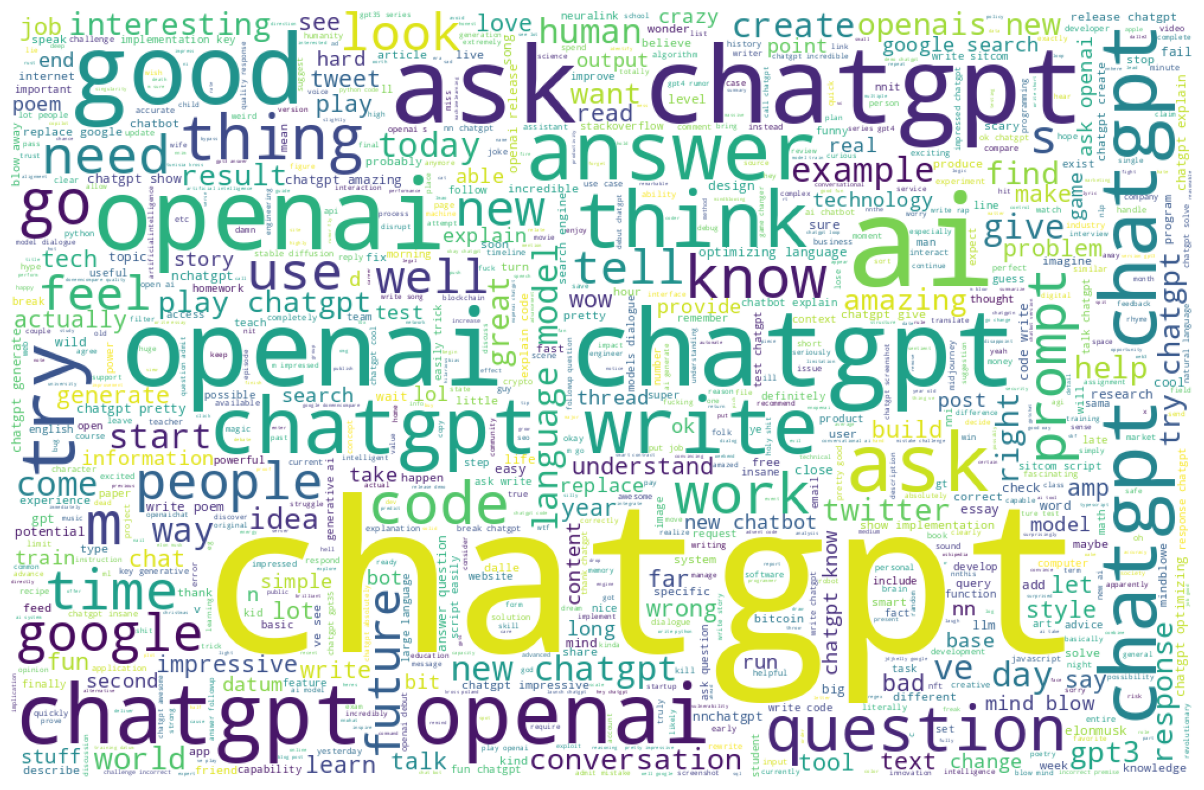

In [ ]:
word_list = [item for sublist in data['text'] for item in sublist]
word_string = " ".join(word_list)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',
                      max_words=60000,width=1000,height=650).generate(word_string)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
pos_data = data[data['sentiment'] == 2]
words_collection = Counter([item for sublist in pos_data['text'] for item in sublist])
freq_word_data = pd.DataFrame(words_collection.most_common(15))
freq_word_data.columns = ['frequently_used_word','count']

freq_word_data.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

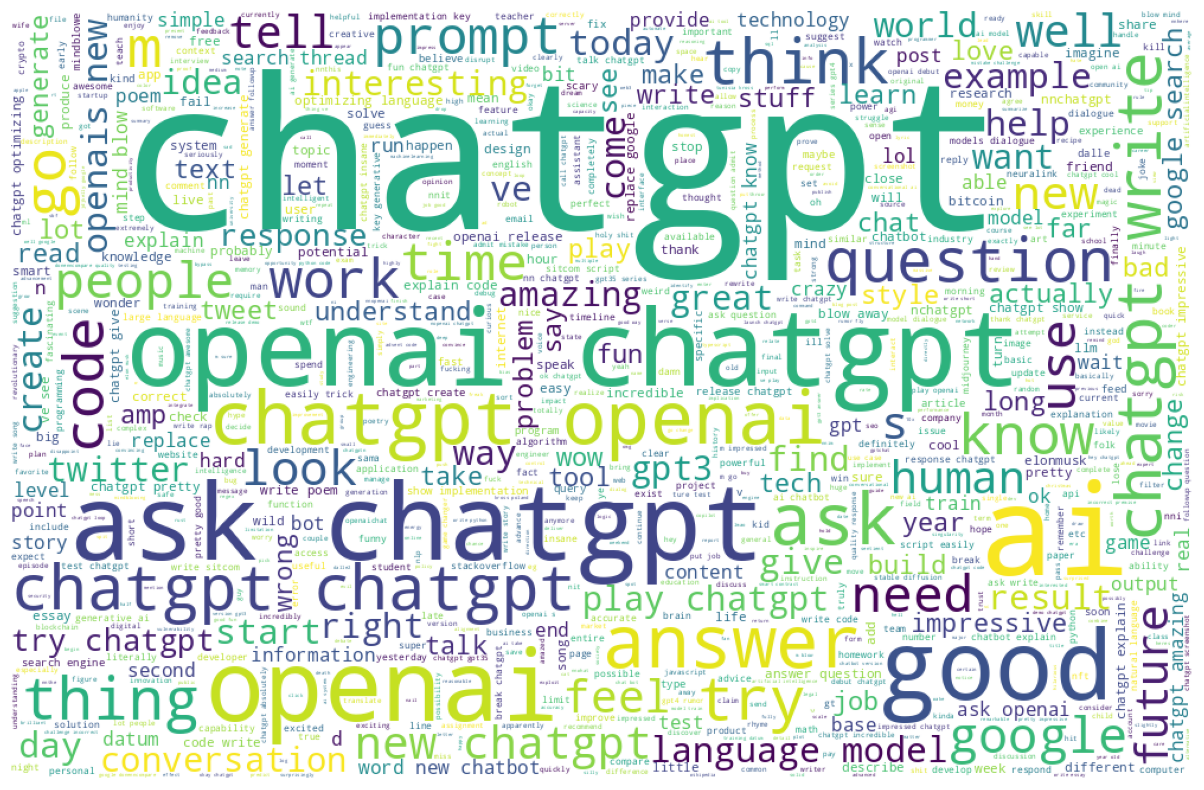

In [ ]:
word_list_pos = [item for sublist in pos_data['text'] for item in sublist]
word_string_pos = " ".join(word_list)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',
                      max_words=40000,width=1000,height=650).generate(word_string_pos)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
neu_data = data[data['sentiment'] == 1]
words_collection = Counter([item for sublist in neu_data['text'] for item in sublist])
freq_word_data = pd.DataFrame(words_collection.most_common(15))
freq_word_data.columns = ['frequently_used_word','count']

freq_word_data.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

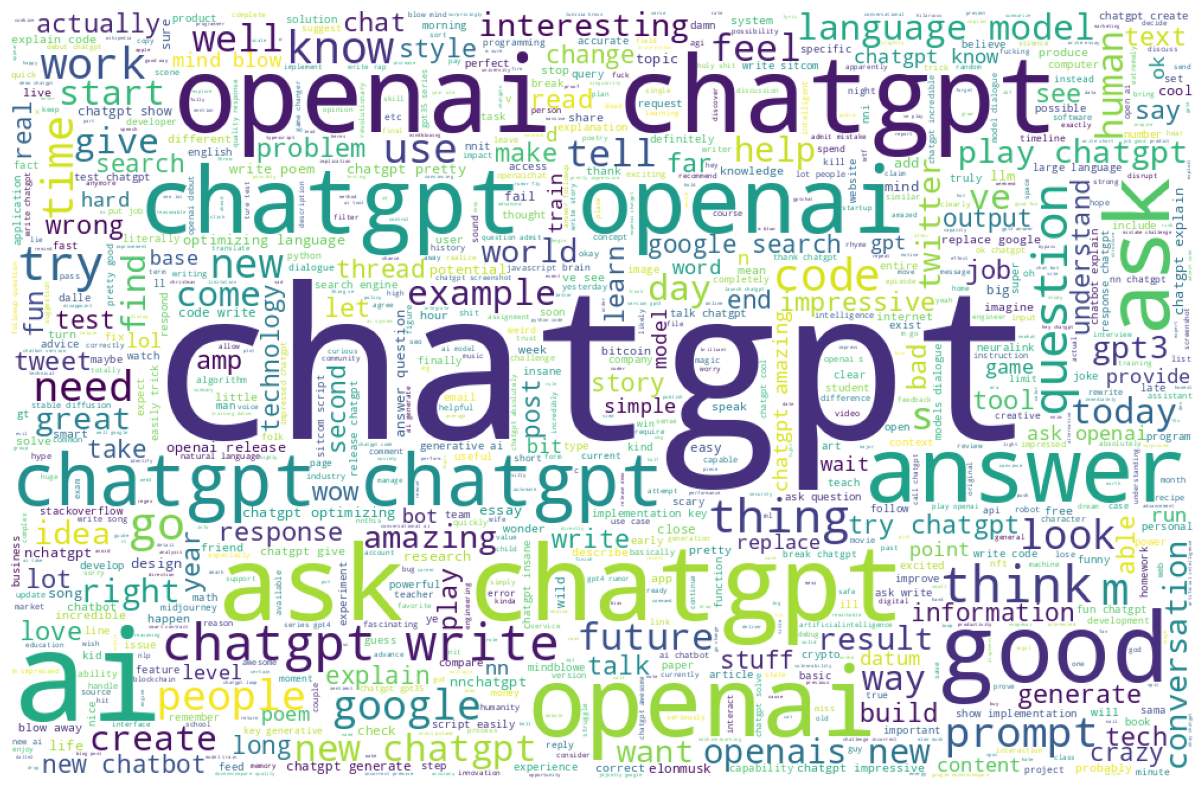

In [ ]:
word_list_neu = [item for sublist in neu_data['text'] for item in sublist]
word_string_neu = " ".join(word_list)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',
                      max_words=40000,width=1000,height=650).generate(word_string_neu)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
word_list_neu = [item for sublist in neu_data['text'] for item in sublist]
word_string_neu = " ".join(word_list)

#wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',
#                      max_words=40000,width=1000,height=650).generate(word_string_neu)

#plt.figure(figsize=(20,10))
#plt.imshow(wordcloud)
#plt.axis('off')
#plt.show()

word_string_neu



'chatgpt optimizing language models dialogue try talk chatgpt new ai system optimize dialogue feedback help improve chatgpt optimizing language models dialogue thrilled share chatgpt new model optimize dialog public free accessible 2 minute ago openai release new chatgpt nnand use right launch chatgpt new ai system optimize dialogue 2 minute ago openai release new chatgpt nnand use right n n chatgpt come strong refuse help stalk agree provide waldo 0penal deploy thing ve helping build couple month chatbot base gpt 3 m excited share vln research preview new model chatgptnnwere try new preview free immediately available waitlist god damn openai stop announce thing busy openai chatgpt optimizing language models dialoguenl chatgpt optimizing language models dialogue openai announce chatgpt model optimize dialogue openai chatgpt optimizing language models dialogue ai techforgood chatgpt optimizing language models dialogue ai techtrends2020 technical chatgpt optimizing language models dialog

In [ ]:
neg_data = data[data['sentiment'] == 0]
words_collection = Counter([item for sublist in neg_data['text'] for item in sublist])
freq_word_data = pd.DataFrame(words_collection.most_common(15))
freq_word_data.columns = ['frequently_used_word','count']

freq_word_data.style.background_gradient(cmap='PuBuGn', low=0, high=0, axis=0, subset=None)

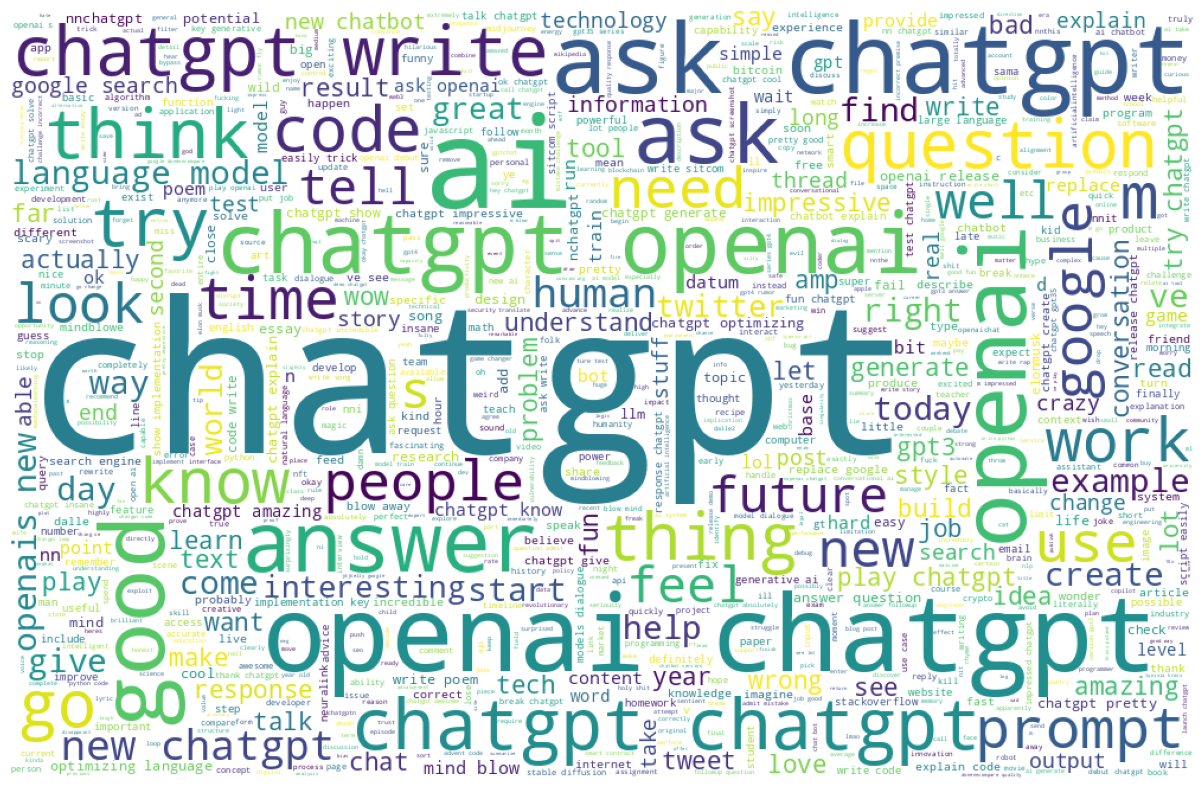

In [ ]:
word_list_neg = [item for sublist in neg_data['text'] for item in sublist]
word_string_neg = " ".join(word_list)

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',
                      max_words=40000,width=1000,height=650).generate(word_string_neg)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()